## Библиотеки и настройки

In [83]:
# импорт библиотек

import pandas as pd # панды
pd.options.mode.chained_assignment = None  # отключаю предупреждения default='warn'


import re # регулярки

import os # для работы с папками и файлами


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import squarify 

import statistics
from scipy.stats import t
from scipy.stats import norm
from scipy import stats

from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


import io
import requests
from IPython.display import Image

%matplotlib inline

In [2]:
# путь к файлам

file_path = 'C:/00_Projects/RIA/2022/02_elk_accidents/'

In [3]:
# вытаскиваю названия файлов в список file_list

file_list = []

for root, dirs, files in os.walk(file_path):
    
    for filename in files:
        file_list += [filename]

In [4]:
print(file_list)

['animal_accidents.xlsx', 'bears.xlsx', 'bear_deaths.xlsx', 'fo_viz.xlsx', 'regions.xlsx', 'RF_regions.xlsx', 'temp.xlsx', '~$animal_accidents.xlsx', 'road_length.xls', 'animal_accidents_original.xlsx', 'mammals_dynamics_flat.xlsx', 'mammals_dynamics_original.xlsx', 'mammals_flat.xlsx', 'mammals_original.xlsx', 'moscow_animals.xlsx', '2011 формы 1.1 и  1.4.xls', '2012 формы 1.1 и 1.4.xls', '2013 формы 1.1 и 1.4.xls', '2014 формы 1.1 и 1.4.xls', '2015 формы 1.1 и 1.4.xls', '2016 формы 1.1 и 1.4.xls', '2017 формы 1.1 и 1.4.xls', '2018 формы 1.1 и 1.4.xlsx', '2019 формы 1.1 и 1.4.xlsx', '2020 формы 1.1 и 1.4.xlsx', 'Форма 1.7 Итог.xlsx', 'elks_old.csv', 'new_bears.csv', 'new_elks.csv']


In [5]:
# выгрузка файла в датафрейм

work = pd.read_excel(file_path + 'animal_accidents.xlsx', sheet_name='regions')

In [6]:
work.sample()

,region_code,federal_disrict,region,year,animal,total,disease,accident,poaching,other
1223,34,Южный ФО,Волгоградская область,2015,Сибирский горный козел,0,0,0,0,0


In [7]:
# количество строк и столбцов

work.shape

(8670, 10)

In [8]:
# типы данных

work.dtypes

region_code         int64
federal_disrict    object
region             object
year                int64
animal             object
total               int64
disease             int64
accident            int64
poaching            int64
other               int64
dtype: object

In [9]:
# проверка на пустые значения

work.isnull().sum()

region_code        0
federal_disrict    0
region             0
year               0
animal             0
total              0
disease            0
accident           0
poaching           0
other              0
dtype: int64

In [10]:
# меняю типы столбцов

work = work.astype({'region_code': 'int32', 'total': 'int32', 'year': 'object'})

In [11]:
# удаляю медведей

#work = work[work.animal != 'Медведи']

In [12]:
work.sample()

,region_code,federal_disrict,region,year,animal,total,disease,accident,poaching,other
5371,17,Сибирский ФО,Республика Тыва,2018,Сайгак,0,0,0,0,0


#### Общее количество погибших животных

In [19]:
total_deaths = (work.groupby('animal', as_index=False)
                .agg({'total': 'sum', 'accident': 'sum'})
                .sort_values('accident', ascending=False)
               )

In [20]:
total_deaths['accident_part'] = round((total_deaths.accident / total_deaths.total) * 100, 1)

In [23]:
total_deaths[1:].head()

#.to_excel(file_path + 'temp.xlsx', index=False)

,animal,total,accident,accident_part
8,Лось,17470,8943,51.2
6,Косули,11595,1870,16.1
4,Кабан,6669,1309,19.6
0,Благородный олень,1066,69,6.5
11,Пятнистый олень,159,66,41.5


In [24]:
# среднее

total_deaths_mean = (work.groupby('animal', as_index=False)
                .agg({'total': 'mean', 'accident': 'mean'})
                .sort_values('accident', ascending=False)
               )

In [25]:
total_deaths_mean['accident_part'] = round((total_deaths_mean.accident / total_deaths_mean.total) * 100, 1)

In [30]:
total_deaths[1:].head()

#.to_excel(file_path + 'temp.xlsx', index=False)

,animal,total,accident,accident_part
8,Лось,17470,8943,51.2
6,Косули,11595,1870,16.1
4,Кабан,6669,1309,19.6
0,Благородный олень,1066,69,6.5
11,Пятнистый олень,159,66,41.5


In [27]:
# медиана

total_deaths_median = (work.groupby('animal', as_index=False)
                .agg({'total': 'median', 'accident': 'median'})
                .sort_values('accident', ascending=False)
               )

In [31]:
total_deaths_median[1:].head()

#.to_excel(file_path + 'temp.xlsx', index=False)

,animal,total,accident
8,Лось,10,2
9,Муфлон,0,0
15,Снежный баран,0,0
14,Сибирский горный козел,0,0
13,Серна,0,0


#### Количество смертей по регионам

In [103]:
# выгрузка файла в датафрейм

work_most = pd.read_excel(file_path + 'animal_accidents.xlsx', sheet_name='most_dying')

In [98]:
work_most.head()

,region_code,federal_disrict,region,year,animal,total,disease,accident,poaching,other,number,number_di,road_length
0,28,Дальневосточный ФО,Амурская область,2015,Благородный олень,2,0,0,2,0,18829.0,18829,16335.2
1,28,Дальневосточный ФО,Амурская область,2016,Благородный олень,0,0,0,0,0,23683.0,23523,16362.8
2,28,Дальневосточный ФО,Амурская область,2017,Благородный олень,0,0,0,0,0,20931.0,21126,16241.9
3,28,Дальневосточный ФО,Амурская область,2018,Благородный олень,5,0,0,4,1,19201.0,19201,16463.4
4,28,Дальневосточный ФО,Амурская область,2019,Благородный олень,6,0,0,6,0,21678.0,21678,16296.2


In [48]:
# ДТП по регионам

total_deaths_region = (work_most.groupby(['animal', 'region'], as_index=False)
                       .agg({'total': 'sum', 'accident': 'sum'})
                       .sort_values('accident', ascending=False)
                      )

In [49]:
total_deaths_region['accident_part'] = round((total_deaths_region.accident / total_deaths_region.total) * 100, 1)

In [86]:
(total_deaths_region
 .head(5)
#.to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,region,total,accident,accident_part
284,Лось,Московская область,1179,997,84.6
281,Лось,Ленинградская область,977,813,83.2
327,Лось,Удмуртская Республика,1752,756,43.2
320,Лось,Смоленская область,1025,665,64.9
336,Лось,Ярославская область,1169,663,56.7


In [51]:
# ДТП по регионам, среднее

total_deaths_region_mean = (work_most.groupby(['animal', 'region'], as_index=False)
                       .agg({'total': 'mean', 'accident': 'mean', 'number': 'mean'})
                       .sort_values('accident', ascending=False)
                      )

In [57]:
total_deaths_region_mean['accident_part'] = round((total_deaths_region_mean.accident / total_deaths_region_mean.total) * 100, 1)

total_deaths_region_mean['number_part'] = round((total_deaths_region_mean.accident / total_deaths_region_mean.number) * 100, 1)

In [87]:
(total_deaths_region_mean.round(1)
 .head(5)
 #.to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,region,total,accident,number,accident_part,number_part
284,Лось,Московская область,196.5,166.2,10306.3,84.6,1.6
281,Лось,Ленинградская область,162.8,135.5,18375.5,83.2,0.7
327,Лось,Удмуртская Республика,292.0,126.0,18380.8,43.2,0.7
320,Лось,Смоленская область,170.8,110.8,19429.5,64.9,0.6
336,Лось,Ярославская область,194.8,110.5,21646.0,56.7,0.5


### Лоси

In [104]:
elks = work_most[work_most['animal'] == 'Лось']

In [105]:
elks

,region_code,federal_disrict,region,year,animal,total,disease,accident,poaching,other,number,number_di,highway_density
18,28,Дальневосточный ФО,Амурская область,2015,Лось,3,0,0,3,0,22374.0,22374,34.1
19,28,Дальневосточный ФО,Амурская область,2016,Лось,1,0,0,0,1,25855.0,25727,34.5
20,28,Дальневосточный ФО,Амурская область,2017,Лось,0,0,0,0,0,22863.0,22972,34.3
21,28,Дальневосточный ФО,Амурская область,2018,Лось,2,0,0,2,0,22586.0,22586,34.4
22,28,Дальневосточный ФО,Амурская область,2019,Лось,2,0,0,2,0,22594.0,22594,34.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,61,Южный ФО,Ростовская область,2016,Лось,2,0,2,0,0,366.0,398,261.9
2540,61,Южный ФО,Ростовская область,2017,Лось,0,0,0,0,0,381.0,381,262.9
2541,61,Южный ФО,Ростовская область,2018,Лось,0,0,0,0,0,402.0,402,264.3
2542,61,Южный ФО,Ростовская область,2019,Лось,0,0,0,0,0,419.0,419,265.4


In [106]:
from scipy.stats import pearsonr

Коэффициент корреляции Пирсона: 0.002980683601056194


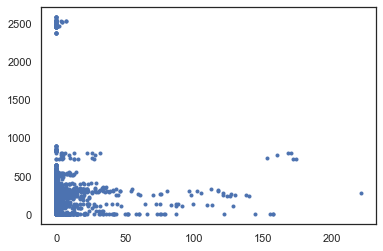

In [93]:
road = pd.read_excel(file_path + 'animal_accidents.xlsx', sheet_name='highway_density')

In [94]:
road

,region,2015,2016,2017,2018,2019,2020
0,Белгородская область,703.693727,729.132030,733.199262,730.774760,734.509446,737.644502
1,Брянская область,306.765043,311.891576,315.214900,320.020774,322.475587,324.810974
2,Владимирская область,335.625430,339.606014,342.989691,347.293299,356.631649,357.272234
3,Воронежская область,327.471264,337.556916,345.496169,358.635211,367.873448,376.526073
4,Ивановская область,332.943925,334.994907,333.953271,334.463598,336.501682,338.125888
...,...,...,...,...,...,...,...
80,Амурская область,34.140923,34.535731,34.348715,34.397930,34.555432,34.662755
81,Магаданская область,5.333405,5.441671,5.547459,5.611044,5.660811,5.639189
82,Сахалинская область,22.707233,23.460390,24.998852,26.673203,28.033639,30.879943
83,Еврейская автономная область,67.526171,67.531791,67.179063,67.311405,67.317906,67.452893


In [96]:
new_road.

,region,year,highway_density
0,Белгородская область,2015,703.693727
1,Брянская область,2015,306.765043
2,Владимирская область,2015,335.625430
3,Воронежская область,2015,327.471264
4,Ивановская область,2015,332.943925
...,...,...,...
80,Амурская область,2020,34.662755
81,Магаданская область,2020,5.639189
82,Сахалинская область,2020,30.879943
83,Еврейская автономная область,2020,67.452893


In [101]:
work_most = work_most.merge(new_road, how='left', on=['region', 'year'])

In [102]:
work_most.to_excel(file_path + 'temp.xlsx', index=False)

#### Кореляция между плотностью дорог и гибелью

In [114]:
work_most.sample(2)

,region_code,federal_disrict,region,year,animal,total,disease,accident,poaching,other,number,number_di,highway_density
1834,33,Центральный ФО,Владимирская область,2019,Благородный олень,2,0,1,0,1,1028.0,1028,356.6
465,59,Приволжский ФО,Пермский край,2018,Косули,1,0,1,0,0,0.0,0,137.5


Коэффициент корреляции Пирсона: 0.5342136414523464


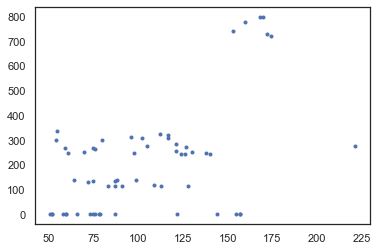

In [113]:
x = work_most[work_most.accident > 50].accident
y = work_most[work_most.accident > 50].highway_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.4907187516193137


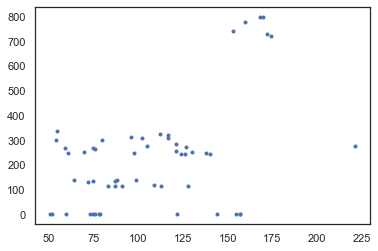

In [115]:
x = elks[elks.accident > 50].accident
y = elks[elks.accident > 50].highway_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)